In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 3d plotting of the iris set for this examples
def plot_iris_clustering(fignum, X, y, title, label_names=None):
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    if label_names is not None:
        for name, label in label_names:
            ax.text3D(X[y == label, 3].mean(),
                      X[y == label, 0].mean(),
                      X[y == label, 2].mean() + 2, name,
                      horizontalalignment='center',
                      bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(title)
    ax.dist = 12
    plt.show()

In [3]:
# dendrogram plotting
# source: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
def plot_dendrogram(model, **kwargs):
   
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Clustering Jerarquico

Clustering Jerarquico corresponde a una familia general de algoritmos de clustering que construyen clusters anidados a partir de mergear y realizar el split de ellos sucesivamente. Esta jerarquia de clusters puede representarse en un arbol (o dendrograma). La raiz del arbol es el cluster unico que unifica todo las muestras, siendo las horas clusters con solamente una muestra del set de datos.

## Carga Inicial del Set de Datos Iris

Utilizamos el set de datos iris ya utilizado en otras oportunidades, el cual tiene 3 dimensiones y tenemos para cada uno de los puntos, una categoria especifica que usaremos como control.

El objetivo que tendremos en general con es sin conocer los labels, intentar recuperar los clusters utilizando el algoritmo de clustering jerarquico.

En la visualizacion de abajo se ve en 3 dimensiones, cada uno de los puntos del set de datos de Iris y a que categoria pertenece cada uno de esos puntos.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data

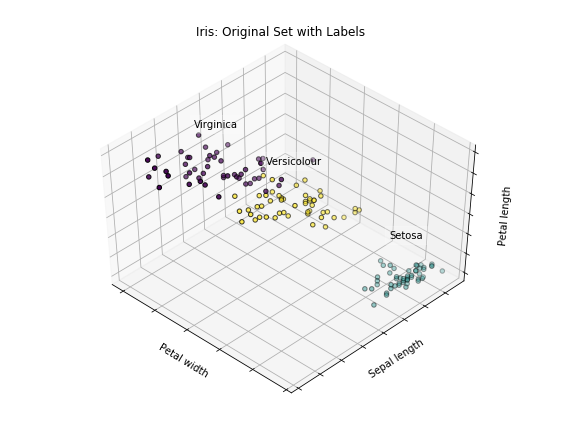

In [5]:
from sklearn.cluster import KMeans
from sklearn import datasets

fignum = 1

X = x
y = iris.target
label_names = [('Setosa', 0),
               ('Versicolour', 1),
               ('Virginica', 2)]

plot_iris_clustering(fignum, X, y, "Iris: Original Set with Labels", label_names)

## Aplicando y Visualizando los resultados del Clustering Jerarquico

El objeto AgglomerativeClustering de sklearn realiza el clustering jerarquico usando un enfoque bottom-up: cada observacion comienza el algoritmo en su propio cluster, y sucesivamente los distintos clusters son mergeados entre si. La propiedad 'linkeage' es la utilizada para definir el criterio a partir del cual se realiza el merge implementando las siguientes opciones:

- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.
- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.
- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

Mas informacion en:

- http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
- http://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py


In [6]:
def iris_agglomerative_clustering(linkage='ward'):
    
    fignum = 1

    iris = datasets.load_iris()
    x = iris.data

    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    model = model.fit(x)
    X = x
    y = model.labels_
    plot_iris_clustering(fignum, X, y, "Hierarchical Clustering: %s linkage" % linkage)


## Dendrograma

A partir de la siguiente implementacion podemos obtener el dendrograma luego de realizar aplicar clustering jerarquico en nuestros datos.

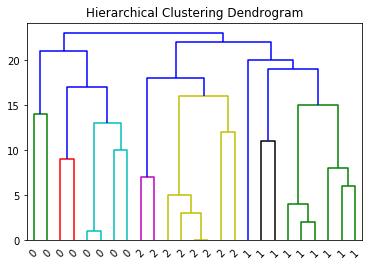

In [13]:
# limitamos la cantidad de datos para poder representarlo
x = iris.data[:25]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

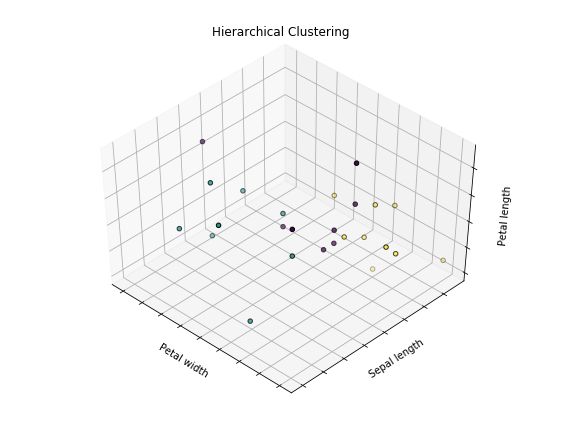

In [14]:
plot_iris_clustering(1, x, model.labels_, "Hierarchical Clustering")

## Clustering Jerarquico: Ward Linkeage

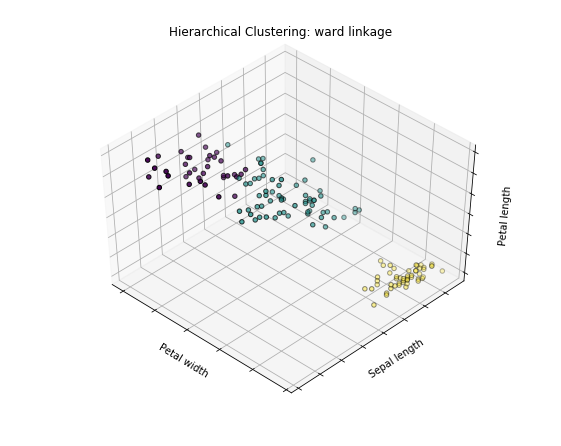

In [15]:
iris_agglomerative_clustering(linkage='ward')

## Clustering Jerarquico: Complete Linkeage

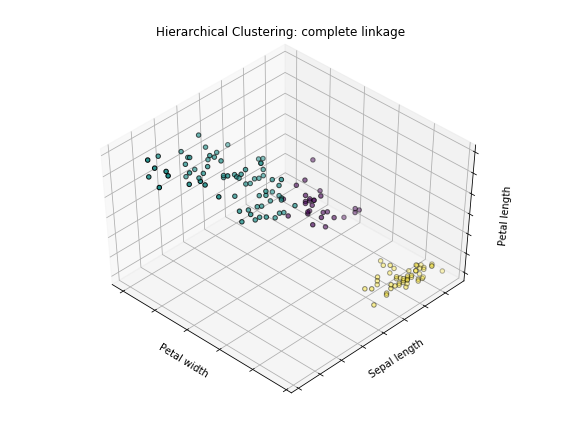

In [16]:
iris_agglomerative_clustering(linkage='complete')

## Clustering Jerarquico: Average Linkeage

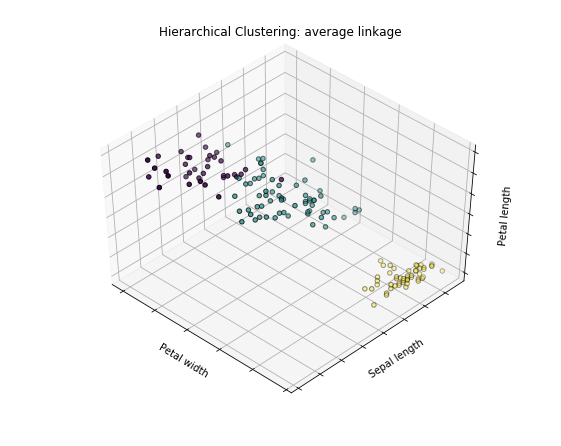

In [17]:
iris_agglomerative_clustering(linkage='average')

## Clustering Jerarquico: Single Linkeage

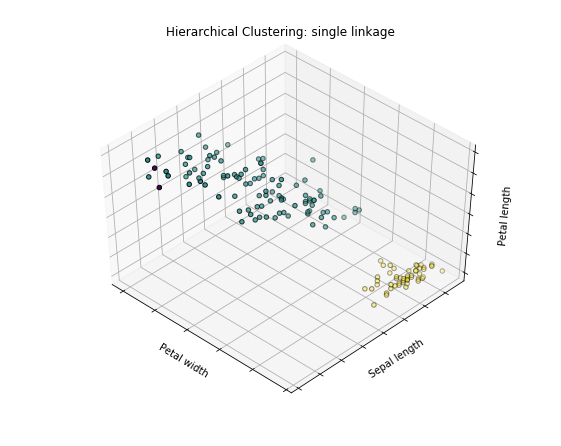

In [18]:
iris_agglomerative_clustering(linkage='single')